## Homework 3
Justin Lau
07/11/20

## Imports

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

Questin 1,5 on pdf

## Question 2

In [5]:
#Defining the elementary lagrange polynomial 
def lagrangian(data,n,k):
    length = len(data)
    lagrangian = []
    for i in range(length):
        if i != k:
            lagrangian.append((n-data[i])/(data[k]-data[i]))
    product = 1
    for j in lagrangian:
        product = product * j
    return product

#Defining the Lebesgue function using the Lagrangian form
def lebesgue(x,nodes):
    length = len(nodes)
    lebesgue = []
    for i in range(length):
        lebesgue.append(abs(lagrangian(nodes,x,i)))
    return sum(lebesgue)

## Part B

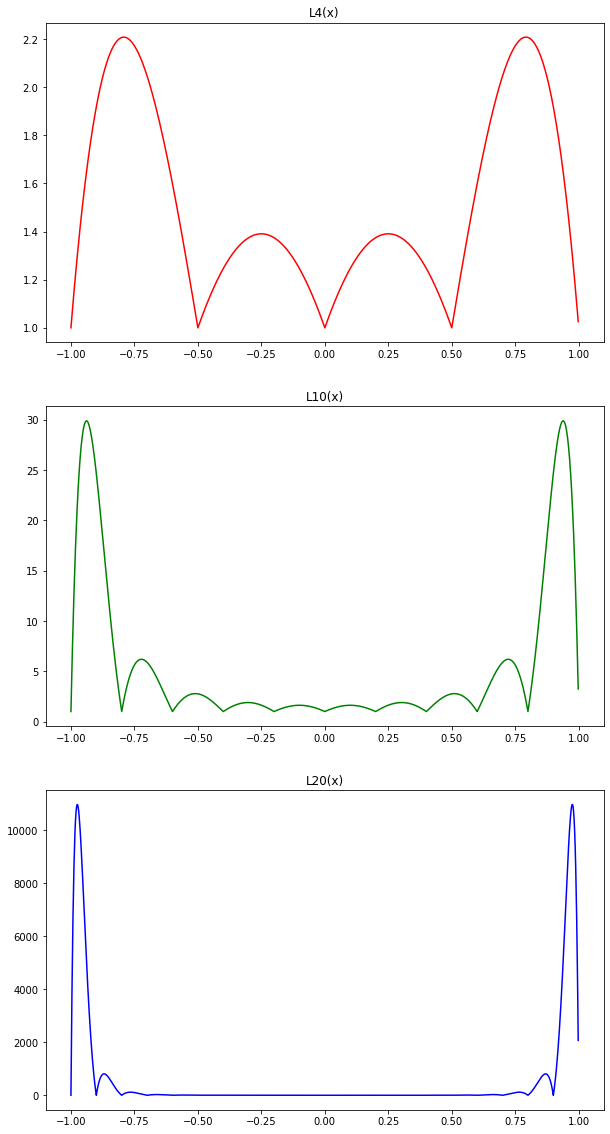

In [6]:
#Given n and ne values to test with
n = [4,10,20]
ne = 1000

#Using given definition of xbar k
xk = np.arange(-1, 1, 2/ne)

#Equidistributed points of xj
points = []
for i in n:
    points.append([-1+j*2/i for j in range(0,i+1)])

#The y values/plot of Lebesgue Ln(x)
Lx = []
for j in points:
    Lx.append([lebesgue(i, j) for i in xk])
    
#Formatting for plots
plt.figure( figsize=(10,20))
colors = ['red', 'green', 'blue']

plt.subplot(3,1,1)
plt.plot(xk, Lx[0], color = colors[0])
plt.title('L4(x)')


plt.subplot(3,1,2)
plt.plot(xk, Lx[1], color = colors[1])
plt.title('L10(x)')


plt.subplot(3,1,3)
plt.plot(xk, Lx[2], color = colors[2])
plt.title('L20(x)')


plt.show()

In [7]:
x = 0
for i in Lx:
    n = [4,10,20]
    print('When n =',n[x],' Lebesgue constant =', max(i))
    x += 1

When n = 4  Lebesgue constant = 2.207824277504
When n = 10  Lebesgue constant = 29.898141093562185
When n = 20  Lebesgue constant = 10979.24392398589


## Part C

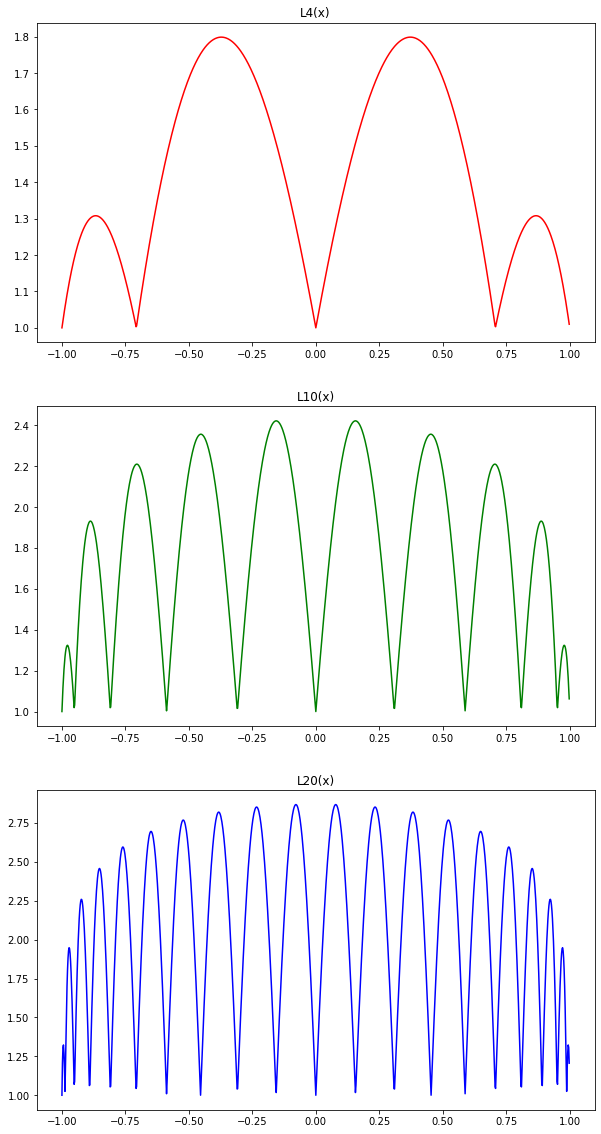

In [8]:
#Chebychev nodes xj
chev = []
for i in n:
    chev.append([math.cos(j*math.pi/i) for j in range(0,i+1)])

#Chebyshev Ln(x)
Lx_chev = []
for j in chev:
    Lx_chev.append([lebesgue(i,j) for i in xk])

#Plots

plt.figure( figsize=(10,20))
colors = ['red', 'green', 'blue']

plt.subplot(3,1,1)
plt.plot(xk, Lx_chev[0], color = colors[0])
plt.title('L4(x)')


plt.subplot(3,1,2)
plt.plot(xk, Lx_chev[1], color = colors[1])
plt.title('L10(x)')


plt.subplot(3,1,3)
plt.plot(xk, Lx_chev[2], color = colors[2])
plt.title('L20(x)')


plt.show()

In [9]:
x = 0
for i in Lx_chev:
    n = [4,10,20]
    print('When n =',n[x],' Lebesgue constant =', max(i))
    x += 1

When n = 4  Lebesgue constant = 1.798761287283697
When n = 10  Lebesgue constant = 2.420968511121212
When n = 20  Lebesgue constant = 2.8677456733774203


## Question 3 Part A

In [10]:
#Implementing Barycentric weights to be used in the interpolation
def bari_weight(data):
    length = len(data)
    weight = []
    for i in range(length):
        bari = []
        for j in range(length):
            if j != i:
                bari.append(data[j] - data[i])
        weight.append(1/np.prod(bari))
    return weight

#Interpolating Polynomial
def bari_interpolating(x,data,f):
    length = len(data)
    num = [bari_weight(data)[i]*f[i]/(x-data[i]) for i in range(length)]
    denom = [bari_weight(data)[i]/(x-data[i]) for i in range(length)]
    return sum(num)/sum(denom)

## Part B

In [11]:
x = [0, 0.25, 0.52, 0.74, 1.28, 1.5]
f = [0, 0.707, 1, 0.7071, -0.7074, -1]

In [12]:
print(bari_interpolating(2,x,f))

-2.3438296081728365


## Question 4 Part A

In [13]:
#Using (4) and (5) given weights for nodes
def weight_bari_interpolating(x,data,f): 
    n = len(data) - 1
    #(4)
    weight = [(-1)**j*math.factorial(n)/math.factorial(j)/math.factorial(n-j) for j in range(n+1)]
    num = [weight[i]*f[i]/(x-data[i]) for i in range(len(data))]
    denom = [weight[i]/(x-data[i]) for i in range(len(data))]
    return sum(num)/sum(denom)

#Using (4) and (5) given weights for chebychev nodes
def ch_bari_interpolating(x,data,f): 
    # (5)
    weight = [(-1)**j for j in range(1,len(data)-1)]
    weight.insert(0,1/2) #when j = 0
    weight.append(1/2*(-1)**(len(data)-1)) #when j=n
    num = [weight[i]*f[i]/(x-data[i]) for i in range(len(data))]
    denom = [weight[i]/(x-data[i]) for i in range(len(data))]
    return sum(num)/sum(denom)

/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


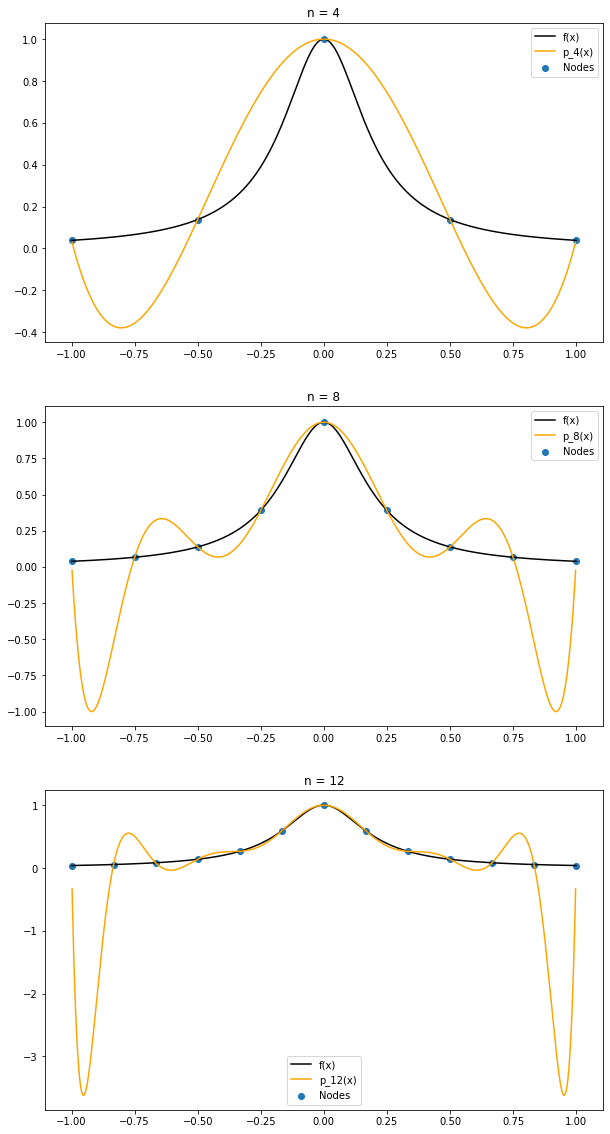

In [19]:
#Given equation for equidistributed nodes with input n
def xj(n): 
    return [-1 + 2*j/n for j in range(n+1)] 

#Given f(x) function with input n, using the equidistributed nodes from the previous function
def fxj(n): 
    return [1/(1+25*x**2) for x in xj(n)] 

#Given n values to evaluate
n = [4,8,12] 

#1000 values in between the range of [-1,1]
ne = np.linspace(-1,1,1000)


plt.figure(figsize=(10,20))

plotnumber = 1
#Using a for loop to clean up code for plotting
#Plotting nodes, interpolating polynomial, and f(x)
for i in n:
    plt.subplot(3,1,plotnumber)
    plt.scatter(xj(i),fxj(i),label = 'Nodes')
    plt.plot(ne, 1/(1+25*ne**2), color = 'black', label = 'f(x)')
    plt.plot(ne,weight_bari_interpolating(ne,xj(i),fxj(i)),color = 'orange',label = 'p_%i(x)' %i)
    plt.title('n = %i' %i)
    plt.legend()
    plotnumber += 1

plt.show()

## Part B

/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


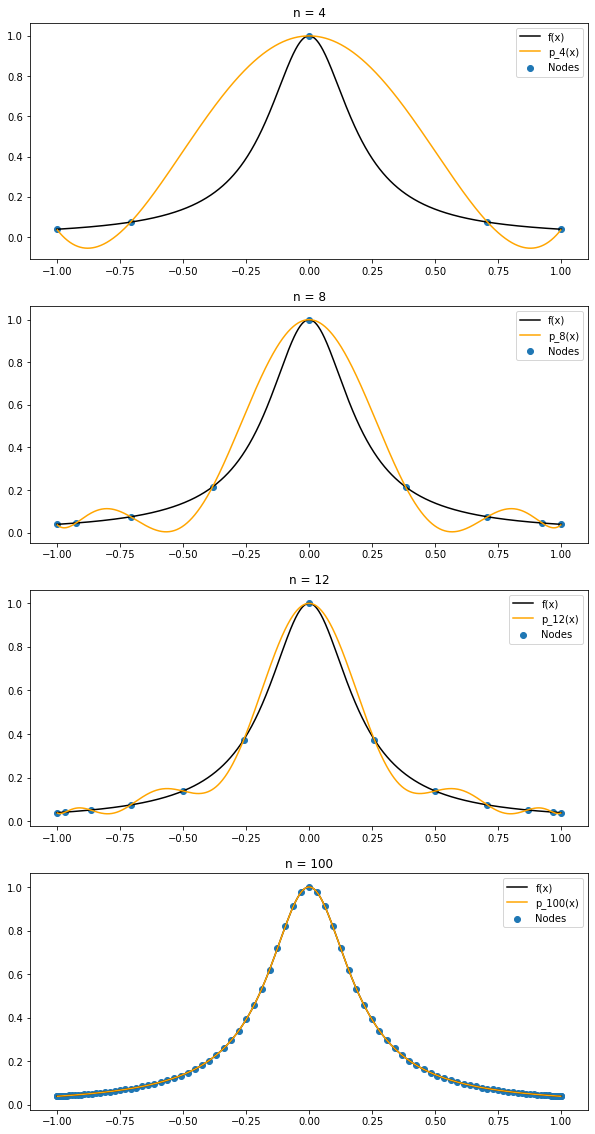

In [20]:
#Given Chebychev nodes equation with input n
def chxj(n): 
    return [math.cos(j*math.pi/n) for j in range(0,n+1)] 

#Given f(x) function with input n, using the equidistributed nodes from the previous function
def chfxj(n): # INPUT: n, function f
    return [1/(1+25*x**2) for x in chxj(n)] 

#Given n values for Chebychev
chebyn = [4,8,12,100] 


plt.figure(figsize=(10,20))
plotnumber = 1

#Using a for loop to clean up code for plotting
#Plotting nodes, interpolating polynomial, and f(x)
for i in chebyn:
    plt.subplot(4,1,plotnumber)
    plt.scatter(chxj(i),chfxj(i),label = 'Nodes')
    plt.plot(ne, 1/(1+25*ne**2),color = 'black',label = 'f(x)')
    plt.plot(ne,ch_bari_interpolating(ne,chxj(i),chfxj(i)),color = 'orange',label = 'p_%i(x)' %i)
    plt.title('n = %i' %i)
    plt.legend()
    plotnumber += 1

plt.show()

## Part C

/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


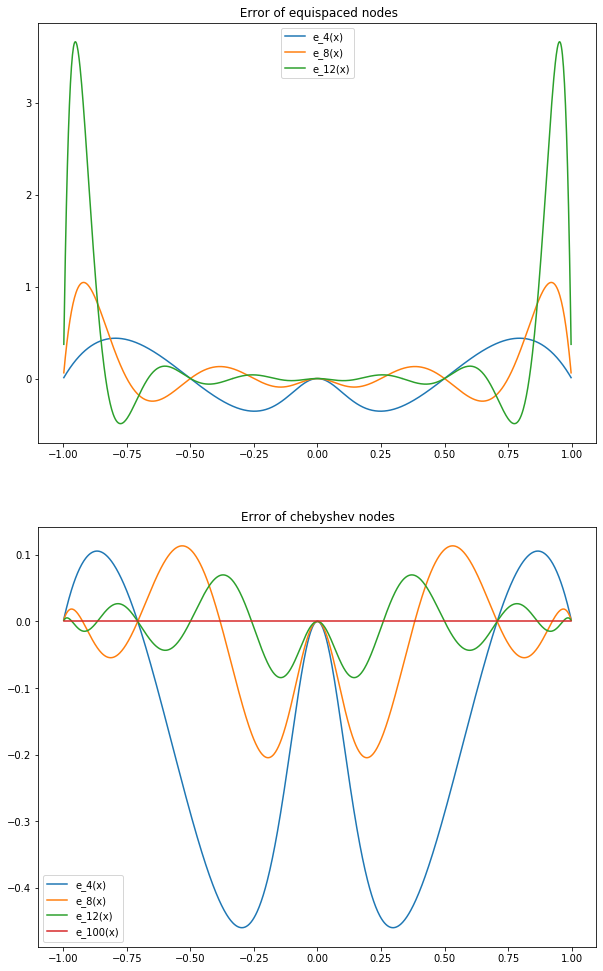

In [21]:
plt.figure(figsize=(10,17))
#Plotting the erros by using the given f(x) - pn equation given, and plotting them to compare errors between n

plt.subplot(2,1,1)
for i in n:
    plt.title(' Error of equispaced nodes')
    plt.plot(ne,1/(1+25*ne**2)-weight_bari_interpolating(ne,xj(i),fxj(i)),label = 'e_%i(x)' %i)
    plt.legend()

    
#and using results to compare equispaced vs chebyshev 
plt.subplot(2,1,2)
for j in chebyn:
    plt.title('Error of chebyshev nodes')
    plt.plot(ne,1/(1+25*ne**2)-ch_bari_interpolating(ne,chxj(j),chfxj(j)) ,label = 'e_%i(x)' %j)
    plt.legend()

plt.show()


As we raise n for the equispaced nodes, the maximum error seems to increase from f(x), which means increase in n doesn't ensure better accuracy to f(x). With the Chebyshev nodes as n increased the maximum error decreased significantly. In general Chebyshev nodes had lower error than the equispaced nodes.

## Part D

/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/justinlau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


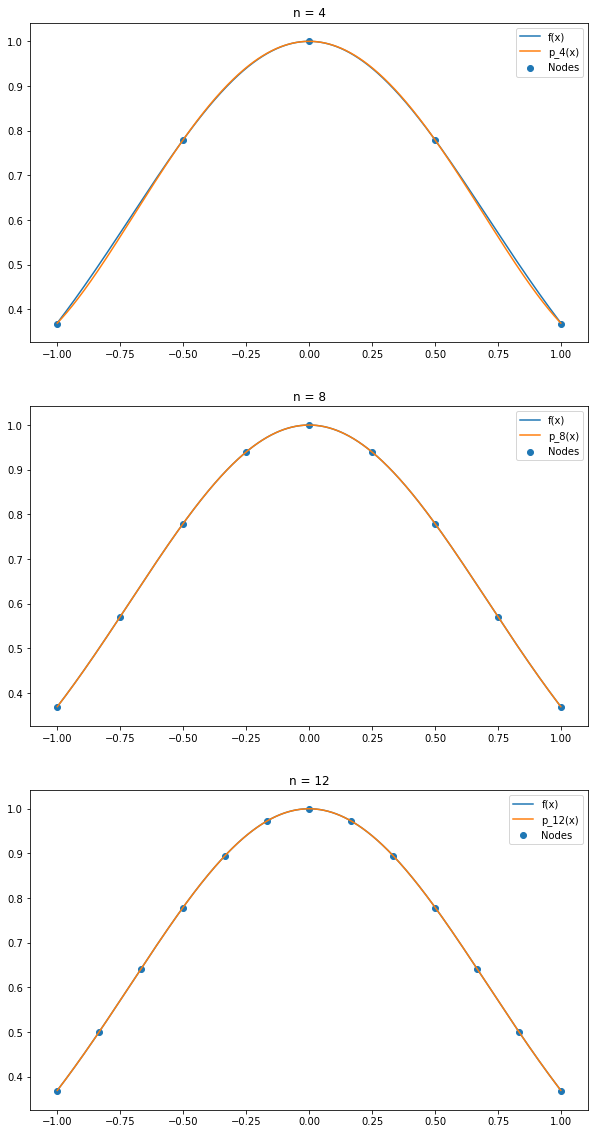

In [22]:
plt.figure(figsize=(10,20))

#Given f(x) function with input n, and using the xj given in part d
def fex(n):
    return [np.exp(-x**2) for x in xj(n)] 

plotnumber = 1
for i in n:
    plt.subplot(3,1,plotnumber)
    plt.scatter(xj(i),fex(i), label = 'Nodes')
    plt.plot(ne, math.e**(-ne**2), label = 'f(x)')
    plt.plot(ne,weight_bari_interpolating(ne,xj(i),fex(i)),label = 'p_%i(x)' %i)
    plt.title('n = %i' %i)
    plt.legend()
    plotnumber += 1

plt.show()

## Question 6

In [16]:
#Using lecture 9
def newton(x,y):
    points = []
    for z in y:
        points.append(z)
    for i in range(1,len(x)):
        #iterating backwards
        for j in np.arange(len(x) - 1, i - 1,-1): 
            points[j] = (points[j] - points[j-1])/(x[j] - x[j-i])  
    return points

def newton_interpolating(x,y,z):
    points = newton(x,y)
    p = points[len(x)-1] #finding the n-1 value
    for i in np.arange(len(x) - 2,-1,-1):
        p = points[i] + (z-x[i])*p
    return p

This is the given function to use:
## p1(0) = x0 + f^-1[y0,y1](0 - y0) = x0 - y0*f^-1[y0,y1].
The given f(x) is:
## f(x) = x - e^-x

In [23]:
x0 = 0.5
fx0 = -0.106530659712633 
x1 = 0.6
fx1 = 0.051188363905973
p10 = x0+(x1-x0)/(fx1-fx0)*(0-fx0)

In [18]:
x = [x0,x1] #Given x0 and x1 points
y = [fx0 , fx1] #Given f(0.5) and f(0.6) values

#picking an extremely small number that is close to 0
zero = 1e-20

#While x(n-1) - e^(x(n-1)) > 0 as we are trying to get as close to 0 as possible
while(abs(x[len(x)-1]-np.exp(-x[len(x)-1])) > zero ):
    x.append(newton_interpolating(y,x,0)) #flipped x and y to find the inverse
    y.append(x[len(x)-1]-np.exp(-x[len(x)-1]) )
for i in range(len(x)):
    print('f(xbar) = ', y[i], 'and xbar = ', x[i])
   

f(xbar) =  -0.106530659712633 and xbar =  0.5
f(xbar) =  0.051188363905973 and xbar =  0.6
f(xbar) =  0.0006288402100822488 and xbar =  0.5675445848373015
f(xbar) =  -7.686763003889041e-09 and xbar =  0.5671432855048316
f(xbar) =  1.1102230246251565e-16 and xbar =  0.567143290409784
f(xbar) =  0.0 and xbar =  0.5671432904097838


Therefore we get f(xbar) = 1.1102230246251565e-16
and xbar = 0.567143290409784